In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy.stats import beta


# First taste of posterior probabilities

## Context:
Imagine a 4 sided globe where you toss and try to figure out what proportion of the globe is made of water (p). W is the number of Water observations, and L is the number of Land observations.

In [2]:
sample = [
    "W",
    "L",
    "W",
    "W",
    "W",
    "L",
    "W",
    "L",
    "W"
]

In [3]:
len(sample)

9

In [4]:
sum_w = len(list(filter(lambda x: x == "W", sample)))
sum_w

6

In [5]:
sum_l = len(list(filter(lambda x: x == "L", sample)))
sum_l

3

In [6]:
p_list = [0, 0.25, 0.5, 0.75, 1]

In [ ]:
def relative_num_ways( p:float, w:int, l:int):
    """
    General formula to calculate the number of ways of observing Water (target variable)

    p is the proportion of water on the 4 sided globe
    w is the number of water observations
    l is the number of land observations
    
    """
    return ((4 * p) ** w) * ((4- 4 * p) ** l)

In [34]:
relative_num_ways(0.75, sum_w, sum_l)

729.0

In [ ]:
posterior_out = {}

for p in p_list:
    posterior = relative_num_ways(p, sum_w, sum_l)
    posterior_out[p] = posterior




In [9]:
posterior_out

{0: 0, 0.25: 27.0, 0.5: 512.0, 0.75: 729.0, 1: 0}

In [10]:
729/1268

0.5749211356466877

In [11]:
# Convert number of possible outcomes to probabilities
total_num_outcomes = sum(posterior_out.values())
for p, v in posterior_out.items():
    posterior_out[p] = v / total_num_outcomes


In [12]:
posterior_out.values()

dict_values([0.0, 0.021293375394321766, 0.4037854889589905, 0.5749211356466877, 0.0])

In [13]:
sum(posterior_out.values())

1.0

Text(0, 0.5, 'Posterior Probabilities')

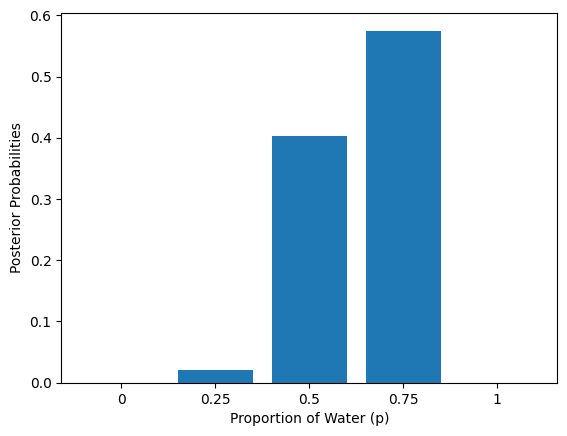

In [14]:
plt.bar(range(len(posterior_out)), posterior_out.values(), align='center')
plt.xticks(range(len(posterior_out)), posterior_out.keys())
plt.xlabel("Proportion of Water (p)")
plt.ylabel("Posterior Probabilities")

In [15]:
# Validate that sum of all posterior probabilities is 1

sum(posterior_out.values())

1.0

# Implement Generative Model

In [16]:
def globe_sampling(p, N=10):
    """
    Simulate N tosses of the 4 sided globe
    """
    return np.random.choice(a = ["W", "L"], size=int(N), p=[p, 1-p])


In [17]:
globe_sampling(0.5, 10)

array(['L', 'L', 'L', 'L', 'L', 'L', 'W', 'W', 'W', 'L'], dtype='<U1')

## How to test generative model?

### Test extreme settings (p=1, p=0)

In [18]:
# Test p=0
globe_sampling(0, 10)

array(['L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L'], dtype='<U1')

In [19]:

globe_sampling(1, 10)

array(['W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W'], dtype='<U1')

## Test that large samples converge to the p value

In [20]:
len(list(filter(lambda x: x == "W", sample)))

6

In [21]:
len(list(filter(lambda x: x == "W",globe_sampling(p=0.5, N=1e4)))) / 1e4

0.4966

# Sampling from the Posterior Distribution

## Why is the posterior distribution of infinite N experiments == Beta Distribution?

https://www.youtube.com/watch?v=juF3r12nM5A 

In [22]:
import seaborn as sns

# Detour: Demonstrating that as more samples are added with the same ratio of a:b, the Beta distribution narrows. 
This represents a decrease in uncertainty

(array([1.22631425, 2.45262849, 4.90525699, 0.        , 3.67894274]),
 array([0.48092981, 0.56247497, 0.64402014, 0.72556531, 0.80711048,
        0.88865564]),
 <BarContainer object of 5 artists>)

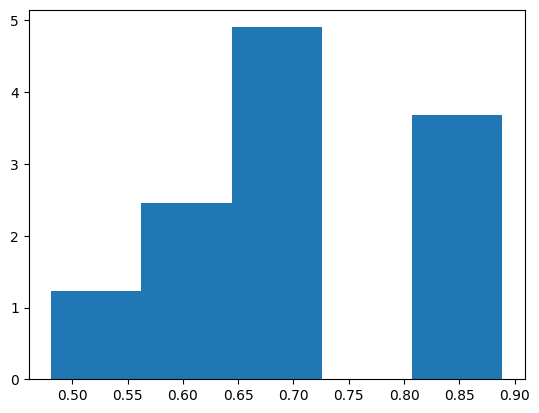

In [23]:
fig, ax = plt.subplots (1,1)

ax.hist(beta.rvs(a = 7+1, b = 3+1, size = 10), density = True, bins = "auto") # the underlying implication is that probability of a is always a/(a+b)

(array([ 0.45540676,  0.45540676,  2.27703379,  1.36622027,  5.92028786,
         9.10813516, 10.01894868,  8.19732165,  5.00947434,  1.36622027,
         1.36622027]),
 array([0.55581978, 0.57777817, 0.59973656, 0.62169495, 0.64365335,
        0.66561174, 0.68757013, 0.70952852, 0.73148691, 0.7534453 ,
        0.7754037 , 0.79736209]),
 <BarContainer object of 11 artists>)

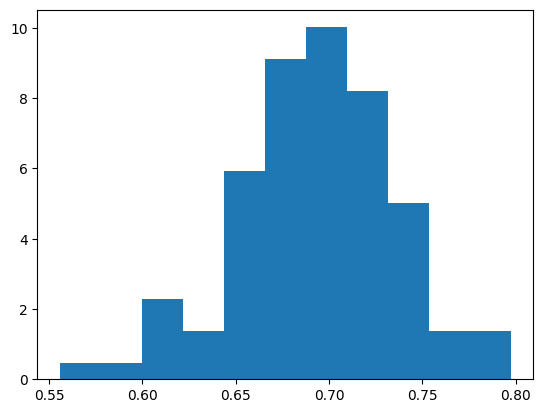

In [24]:
fig, ax = plt.subplots (1,1)

ax.hist(beta.rvs(a = 70+1, b = 30+1, size = 100), density = True, bins = "auto")


(array([ 0.25562989,  0.        ,  0.        ,  0.51125978,  0.51125978,
         1.53377935,  2.04503913,  4.34570815,  2.8119288 ,  8.94704618,
        14.31527389, 19.6835016 , 20.45039127, 22.23980051, 26.84113855,
        26.58550866, 28.37491789, 20.70602117, 19.42787171, 13.03712444,
        10.22519564,  5.6238576 ,  3.32318858,  1.78940924,  1.27814945,
         0.51125978,  0.        ,  0.        ,  0.25562989]),
 array([0.63984427, 0.64375617, 0.64766808, 0.65157999, 0.65549189,
        0.6594038 , 0.6633157 , 0.66722761, 0.67113951, 0.67505142,
        0.67896332, 0.68287523, 0.68678714, 0.69069904, 0.69461095,
        0.69852285, 0.70243476, 0.70634666, 0.71025857, 0.71417047,
        0.71808238, 0.72199429, 0.72590619, 0.7298181 , 0.73373   ,
        0.73764191, 0.74155381, 0.74546572, 0.74937763, 0.75328953]),
 <BarContainer object of 29 artists>)

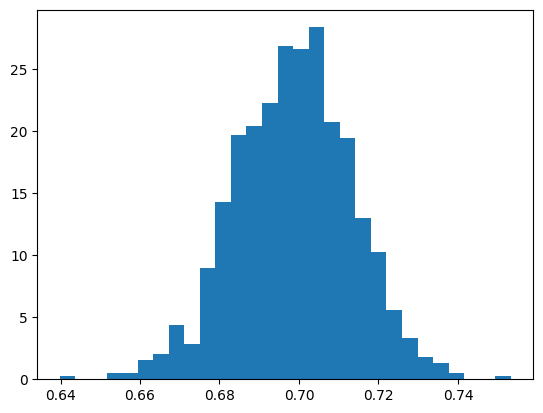

In [25]:
fig, ax = plt.subplots (1,1)

ax.hist(beta.rvs(a = 700+1, b = 300+1, size = 1000), density = True, bins = "auto")

(array([ 0.57928578,  0.77238104,  0.57928578,  1.35166682,  2.51023838,
         2.31714312,  4.05500046,  5.7928578 ,  4.8273815 , 10.62023931,
        14.86833503, 18.73024023, 22.97833595, 31.28143214, 36.49500416,
        43.060243  , 48.66000555, 48.27381502, 61.59738797, 55.61143491,
        60.63191167, 55.80453017, 60.05262589, 55.03214913, 50.78405341,
        49.81857711, 44.21881456, 41.51548092, 31.66762266, 26.64714589,
        18.53714497, 17.57166867, 11.58571561,  7.14452462,  6.37214358,
         5.02047676,  2.8964289 ,  1.54476208,  1.54476208,  0.77238104,
         0.77238104,  0.38619052,  0.        ,  0.19309526]),
 array([0.67797345, 0.67900921, 0.68004497, 0.68108072, 0.68211648,
        0.68315224, 0.684188  , 0.68522376, 0.68625952, 0.68729527,
        0.68833103, 0.68936679, 0.69040255, 0.69143831, 0.69247407,
        0.69350982, 0.69454558, 0.69558134, 0.6966171 , 0.69765286,
        0.69868861, 0.69972437, 0.70076013, 0.70179589, 0.70283165,
        0.7038

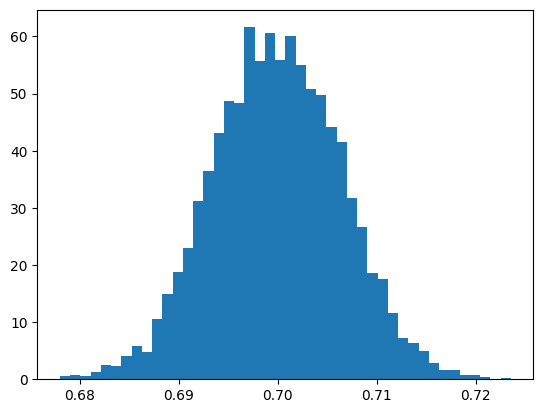

In [26]:
fig, ax = plt.subplots (1,1)

ax.hist(beta.rvs(a = 3500+1, b = 1500+1, size = 5000), density = True, bins = "auto")

## Detour: Thompson Sampling
https://www.youtube.com/watch?v=nkyDGGQ5h60

## Sampling from the beta distribution (posterior distribution)

In [27]:
from scipy.stats import beta

random_sample = beta.rvs(a = 6+1, b = 3+1, size = 1000)

# +1 is needed for a and b because the underlying formula uses (a-1) and (b-1)

In [28]:
random_sample

array([0.68129723, 0.66439868, 0.77208373, 0.76653481, 0.63193906,
       0.60383654, 0.70896731, 0.69379939, 0.8015671 , 0.72112511,
       0.97861386, 0.589008  , 0.62605392, 0.54886144, 0.62936945,
       0.47789414, 0.76180736, 0.68183837, 0.84690198, 0.88861611,
       0.65855991, 0.73357055, 0.57906459, 0.29273848, 0.47072804,
       0.47648513, 0.71684496, 0.65571686, 0.70129999, 0.63477322,
       0.64488263, 0.73694128, 0.70140259, 0.62470175, 0.8421283 ,
       0.65234688, 0.45789935, 0.6491202 , 0.73230437, 0.61991848,
       0.5211006 , 0.63660245, 0.53902875, 0.65706022, 0.71712572,
       0.5200977 , 0.73193263, 0.69514176, 0.6419525 , 0.5522899 ,
       0.79422987, 0.60693987, 0.59221729, 0.78881704, 0.76084835,
       0.75781381, 0.78664661, 0.6445441 , 0.71767604, 0.76503462,
       0.4535932 , 0.67512863, 0.73118999, 0.33134678, 0.46192458,
       0.69839713, 0.9036673 , 0.54783196, 0.51413368, 0.46351595,
       0.72127394, 0.44233094, 0.71257141, 0.69025606, 0.76305

(array([0.05426092, 0.        , 0.02713046, 0.18991323, 0.2170437 ,
        0.59687016, 0.75965294, 1.1394794 , 1.49217541, 1.54643633,
        2.17043696, 2.52313297, 2.90295943, 2.60452435, 2.30608927,
        2.74017666, 2.30608927, 1.60069726, 1.22087079, 0.40695693,
        0.32556554]),
 array([0.16547006, 0.202329  , 0.23918794, 0.27604688, 0.31290581,
        0.34976475, 0.38662369, 0.42348262, 0.46034156, 0.4972005 ,
        0.53405944, 0.57091837, 0.60777731, 0.64463625, 0.68149519,
        0.71835412, 0.75521306, 0.792072  , 0.82893094, 0.86578987,
        0.90264881, 0.93950775]),
 <BarContainer object of 21 artists>)

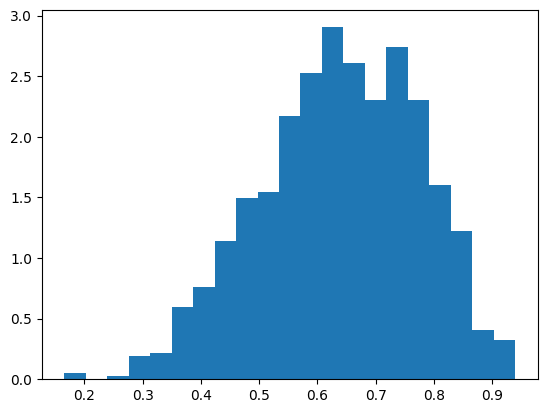

In [29]:
fig, ax = plt.subplots (1,1)

ax.hist(beta.rvs(a = 6+1, b = 3+1, size = 1000), density = True, bins = "auto")

## Deriving the Posterior Predictive Distribution

### First round of sampling: Predictive Distribution for p (assuming 9 tosses per experiment)

In [30]:
random_sample

array([0.68129723, 0.66439868, 0.77208373, 0.76653481, 0.63193906,
       0.60383654, 0.70896731, 0.69379939, 0.8015671 , 0.72112511,
       0.97861386, 0.589008  , 0.62605392, 0.54886144, 0.62936945,
       0.47789414, 0.76180736, 0.68183837, 0.84690198, 0.88861611,
       0.65855991, 0.73357055, 0.57906459, 0.29273848, 0.47072804,
       0.47648513, 0.71684496, 0.65571686, 0.70129999, 0.63477322,
       0.64488263, 0.73694128, 0.70140259, 0.62470175, 0.8421283 ,
       0.65234688, 0.45789935, 0.6491202 , 0.73230437, 0.61991848,
       0.5211006 , 0.63660245, 0.53902875, 0.65706022, 0.71712572,
       0.5200977 , 0.73193263, 0.69514176, 0.6419525 , 0.5522899 ,
       0.79422987, 0.60693987, 0.59221729, 0.78881704, 0.76084835,
       0.75781381, 0.78664661, 0.6445441 , 0.71767604, 0.76503462,
       0.4535932 , 0.67512863, 0.73118999, 0.33134678, 0.46192458,
       0.69839713, 0.9036673 , 0.54783196, 0.51413368, 0.46351595,
       0.72127394, 0.44233094, 0.71257141, 0.69025606, 0.76305

In [66]:
for p in random_sample[0:1]:
    print(p)

0.6812972290202236


In [ ]:
experiment_res = {0:0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}
res_list = []

w_check = []

for p in random_sample:
    sampling_experiments = globe_sampling(p, N = 9)
    temp_sum_w = len(list(filter(lambda x: x == "W", sampling_experiments)))
    temp_sum_l = len(list(filter(lambda x: x == "L", sampling_experiments)))

    # Quick debugging
    # print(sampling_experiments)
    # print(temp_sum_w, temp_sum_l)

    w_check.append(temp_sum_w)

    temp_num_ways = relative_num_ways(p, temp_sum_w, temp_sum_l)
    # experiment_res[temp_sum_w] += relative_num_ways(p, temp_sum_w, temp_sum_l)
    experiment_res[temp_sum_w] += temp_num_ways


In [72]:
experiment_res

{0: np.float64(40050.459810186716),
 1: np.float64(36490.337131906774),
 2: np.float64(25733.47040137826),
 3: np.float64(37871.031077042964),
 4: np.float64(47448.7001087305),
 5: np.float64(69306.22652544563),
 6: np.float64(151088.1657679088),
 7: np.float64(336836.66157410847),
 8: np.float64(813839.4249805923),
 9: np.float64(2623299.3097187034)}

Text(0, 0.5, 'Relative number of ways to observe W')

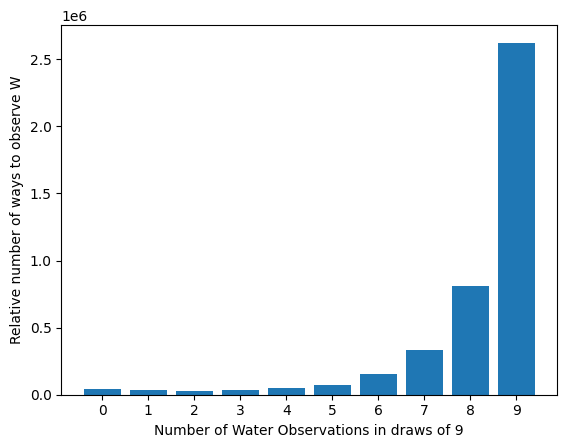

In [73]:
plt.bar(range(len(experiment_res)), experiment_res.values(), align='center')
plt.xticks(range(len(experiment_res)), experiment_res.keys())
plt.xlabel("Number of Water Observations in draws of 9")
plt.ylabel("Relative number of ways to observe W")

In [ ]:
# Flatten results table

experiment_res_flat = [item for sublist in res_list for item in sublist]

In [ ]:
len(experiment_res_flat)

10000

In [ ]:
sum_w = len(list(filter(lambda x: x == "W", experiment_res_flat)))
sum_w

6530

(array([0.02545478, 0.        , 0.        , 0.05090956, 0.28000258,
        0.45818604, 0.43273126, 0.91637208, 1.17091988, 1.75637981,
        2.13820151, 2.49456843, 2.46911365, 3.25821183, 2.36729453,
        2.31638497, 2.29093019, 1.78183459, 0.86546252, 0.28000258,
        0.10181912]),
 array([0.13054449, 0.16982985, 0.2091152 , 0.24840055, 0.2876859 ,
        0.32697126, 0.36625661, 0.40554196, 0.44482731, 0.48411267,
        0.52339802, 0.56268337, 0.60196872, 0.64125408, 0.68053943,
        0.71982478, 0.75911013, 0.79839549, 0.83768084, 0.87696619,
        0.91625154, 0.9555369 ]),
 <BarContainer object of 21 artists>)

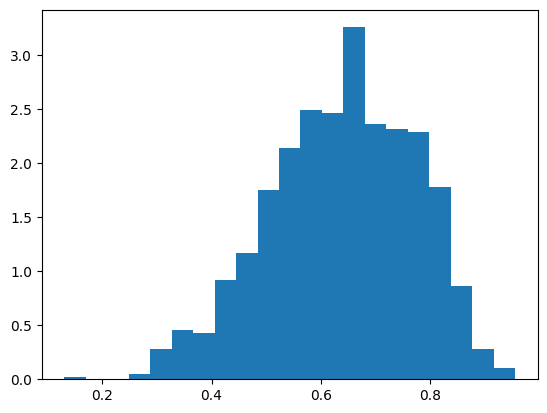

In [35]:
# Visualize cumulative results of all experiments

fig, ax = plt.subplots (1,1)

ax.hist(beta.rvs(a = 6+1, b = 3+1, size = 1000), density = True, bins = "auto")

In [ ]:
# Sample from all experiment outcomes?

# posterior_predictive_distribution = 

In [ ]:
fig, ax = plt.subplots(1,1)

# sample from 

### Second round of sampling: Posterior Distribution for all experiments run in the first round